In [20]:
%matplotlib inline

import uproot
import glob
import pprint
import matplotlib.pyplot as plt


pp = pprint.PrettyPrinter()
files = glob.glob("/ceph/aissac/ntuple_for_graphs/prod_2018_v2_processed_v4" + "/**/*.root", recursive=True)
files = [file + ':taus' for file in files]
#pp.pprint(files)

folder = 'trimmed_200000_and_cut_deltaR_smaller_0Point5'
folder = 'trimmed_500000_and_added_deltaPhiEtaR'
testfile = f'/ceph/aissac/ntuple_for_graphs/prod_2018_v2_processed_v5/{folder}/DYJetsToLL_M-50_taus.root:taus'
ttree = uproot.open(testfile)
print("")

pp.pprint(f'keys: {ttree.keys()}')
print("")

#pp.pprint(f'values: {ttree.values()}')
print("")

pp.pprint(ttree.show())


("keys: ['tau_pt', 'tau_eta', 'tau_phi', 'tau_mass', 'tau_charge', "
 "'tau_decayMode', 'pfCand_DeltaPhi', 'pfCand_DeltaEta', 'pfCand_DeltaR', "
 "'pfCand_Pt', 'pfCand_Eta', 'pfCand_Phi', 'pfCand_Mass', 'pfCand_Charge', "
 "'pfCand_ParticleType', 'pfCand_JetDaughter', 'pfCand_PuppiWeightNoLep']")


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
tau_pt               | float                    | AsDtype('>f4')
tau_eta              | float                    | AsDtype('>f4')
tau_phi              | float                    | AsDtype('>f4')
tau_mass             | float                    | AsDtype('>f4')
tau_charge           | int32_t                  | AsDtype('>i4')
tau_decayMode        | int32_t                  | AsDtype('>i4')
pfCand_DeltaPhi      | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
pfCand_DeltaEta      | std::vector<float>       | AsJagged(AsDtype

In [2]:
import awkward as ak
plt.rcParams.update({'font.size': 16})

pfCand_deltaPhi = ttree['pfCand_deltaPhi'].array()
pfCand_deltaEta = ttree['pfCand_deltaEta'].array()
pfCand_deltaR = ttree['pfCand_deltaR'].array()
nNodes = [len(x) for x in pfCand_deltaPhi]
nEdges = [x*(x-1) for x in nNodes]

print(f'graph count: {len(pfCand_deltaPhi)}')

print(f'Max node count: {max(nNodes)}')
print(f'Min node count: {min(nNodes)}')

print(f'Max edge count: {max(nEdges)}')
print(f'Min edge count: {min(nEdges)}')

graph count: 200000
Max node count: 106
Min node count: 2
Max edge count: 11130
Min edge count: 2


2
106
2.0 64.0
2.52
2.56
2.6
2.64
2.68
2.72
2.76
2.8
2.84
2.88
2.92
2.96
3.0
final binWidth: 3.0, maxVal: 77.0
[ 2.  5.  8. 11. 14. 17. 20. 23. 26. 29. 32. 35. 38. 41. 44. 47. 50. 53.
 56. 59. 62. 65. 68. 71. 74. 77.]


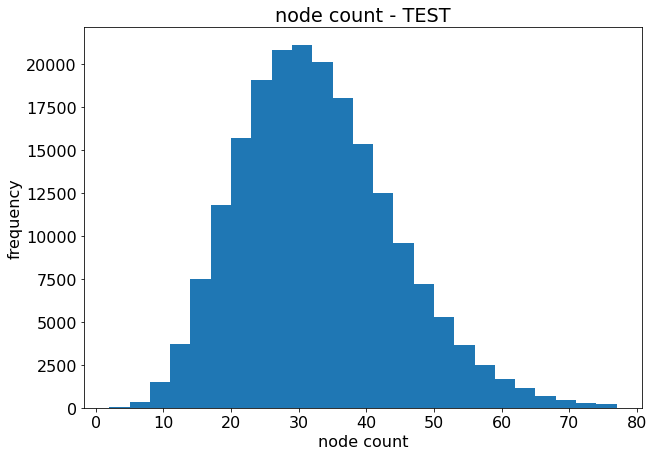

'\nplt.figure(figsize=(10,7))\nplt.hist(nEdges, bins=nBins)\nplt.title(f\'edge count - {cut}\')\nplt.xlabel("edge count")\nplt.ylabel("frequency")\nplt.savefig(f\'{cut}_EdgeCount.png\')\nplt.show()\n'

In [16]:
#nBins = 100
nBins = 'auto'
cut = "TEST"

print(min(nNodes))
print(max(nNodes))
import numpy as np
nNodes = ak.to_numpy(ak.flatten(nNodes, axis=None))
p = np.percentile(nNodes, [0,99])
minVal = p[0]
maxVal = p[1]
print(minVal, maxVal)
n = 25

binWidth = (maxVal - minVal) / n
while(binWidth.is_integer() == False):
    maxVal += 1
    binWidth = (maxVal-minVal) / n
print(f'final binWidth: {binWidth}, maxVal: {maxVal}')
bins = np.linspace(minVal, maxVal, n+1)
print(bins)

"""
plt.figure(figsize=(10,7))
plt.hist(ak.flatten(pfCand_deltaPhi, axis=None), bins=nBins)
plt.title(f'pfCand_deltaPhi - {cut}')
plt.xlabel("pfCand_deltaPhi")
plt.ylabel("frequency")
plt.savefig(f'{cut}_pfCand_deltaPhi.png')
plt.show()

plt.figure(figsize=(10,7))
plt.hist(ak.flatten(pfCand_deltaEta, axis=None), bins=nBins)
plt.title(f'pfCand_deltaEta - {cut}')
plt.xlabel("pfCand_deltaEta")
plt.ylabel("frequency")
plt.savefig(f'{cut}_pfCand_deltaEta.png')
plt.show()

plt.figure(figsize=(10,7))
plt.hist(ak.flatten(pfCand_deltaR, axis=None), bins=nBins)
plt.title(f'pfCand_deltaR - {cut}')
plt.xlabel("pfCand_deltaR")
plt.ylabel("frequency")
plt.savefig(f'{cut}_pfCand_deltaR.png')
plt.show()
"""

plt.figure(figsize=(10,7))
plt.hist(nNodes, bins=bins)
plt.title(f'node count - {cut}')
plt.xlabel("node count")
plt.ylabel("frequency")
plt.savefig(f'{cut}_NodeCount.png')
plt.show()
"""
plt.figure(figsize=(10,7))
plt.hist(nEdges, bins=nBins)
plt.title(f'edge count - {cut}')
plt.xlabel("edge count")
plt.ylabel("frequency")
plt.savefig(f'{cut}_EdgeCount.png')
plt.show()
"""